# Tarea 3 Inteligencia Artificial
## Grupo 16
### Alumnos:

*   Javier Ramos
*   Benjamin Torres

---


##Parte 1 - Eleccion y Explicacion del Dataset:
https://www.kaggle.com/datasets/budincsevity/szeged-weather

El dataset elegido corresponde a un conjunto de datos climáticos de la ciudad de Szeged en Hungria entre los años 2006 y 2016, entre los datos que se tienen disponibles estan:


*   Tiempo
*   Tipo de precipitacion
*   Humedad
*   Temperatura
*   Temperatura aparente
*   Velocidad del viento
*   Visibilidad
*   Presión




In [ ]:
!pip install -q -U --upgrade matplotlib
!pip install -q --upgrade scikit-learn
!pip install -q ipympl

     |████████████████████████████████| 11.2 MB 5.1 MB/s 
     |████████████████████████████████| 965 kB 46.8 MB/s 
     |████████████████████████████████| 510 kB 4.8 MB/s 
     |████████████████████████████████| 1.6 MB 11.7 MB/s 


Luego de ejecutar este espacio de codigo con los pips, reiniciar el entorno de ejecucion y seguir con el resto del codigo, no es necesario volver a correr los pips.
A continuacion debera subir el archivo "weatherHistory.csv", el cual puede ser descargado del link de mas arriba

In [ ]:
from google.colab import files
from google.colab import output
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory.csv


Los siguientes comandos !pip sirven para ver las versiones intaladas de las librerias, solo correr de encontrar algun problema y en caso de que la version de matplotlib sea distinta a las 3.5.3, reiniciar el entorno de ejecucion, pero esto deberia haber sido solucionado con el primer reinicio de entorno.

In [ ]:
!pip show scikit-learn

In [ ]:
!pip show matplotlib

In [ ]:
!pip show ipympl

Se importan las librerias necesarias y se importa tambien el matplotlib widget que sera utilizado en los graficos 3D mas adelante.

In [ ]:
%matplotlib widget

import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import math
import seaborn as sns

from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split


In [ ]:
from pandas import read_csv

#Se carga el dataset entregado en un dataframe de pandas y se imprimen las primeras 5 lineas.
df = read_csv(io.BytesIO(uploaded['weatherHistory.csv']))
df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

Con el siguiente comando se muestran estadisticas del dataset por columna, comoo la media, la desviacion estandar, los quintiles y la cantidad de filas.

In [ ]:
df.describe().T

count         mean         std        min  \
Temperature (C)           96453.0    11.932678    9.551546 -21.822222   
Apparent Temperature (C)  96453.0    10.855029   10.696847 -27.716667   
Humidity                  96453.0     0.734899    0.195473   0.000000   
Wind Speed (km/h)         96453.0    10.810640    6.913571   0.000000   
Wind Bearing (degrees)    96453.0   187.509232  107.383428   0.000000   
Visibility (km)           96453.0    10.347325    4.192123   0.000000   
Loud Cover                96453.0     0.000000    0.000000   0.000000   
Pressure (millibars)      96453.0  1003.235956  116.969906   0.000000   

                                  25%        50%          75%          max  
Temperature (C)              4.688889    12.0000    18.838889    39.905556  
Apparent Temperature (C)     2.311111    12.0000    18.838889    39.344444  
Humidity                     0.600000     0.7800     0.890000     1.000000  
Wind Speed (km/h)            5.828200     9.9659    14.135800    63.852600  
Wind Bearing (degrees)     116.000000   180.0000   290.000000   359.000000  
Visibility (km)              8.339800    10.0464    14.812000    16.100000  
Loud Cover                   0.000000     0.0000     0.000000     0.000000  
Pressure (millibars)      1011.900000  1016.4500  1021.090000  1046.380000

Se puede ver que la columna "Loud Cover", solo presenta 0 en sus datos, por lo que se procede a dropear, ademas de limpiar el dataset de los posibles campos NaN.

In [ ]:
# Eliminating NaN or missing input numbers
df.fillna(method ='ffill', inplace = True)
df.drop('Loud Cover', axis=1, inplace=True)

Ahora se crea un heatmap el cual permite ver la correlacion que hay entre las columnas del dataframe, donde tanto los valores cercanos al 1 o -1 representan una relacion mas fuerte, mientras que el signo indica si esta es creciente (para el caso del 1 positivo) o decreciente (para el 1 negativo). Esto se usa entonces para determinar con cuales campos se trabajara.


Si el siguiente fragmento de código entrega un error del tipo "figure.canvas.mpl_disconnect(figure.canvas.manager.button_press_handler_id)" será necesario reiniciar el entorno de ejecución.

<AxesSubplot:>

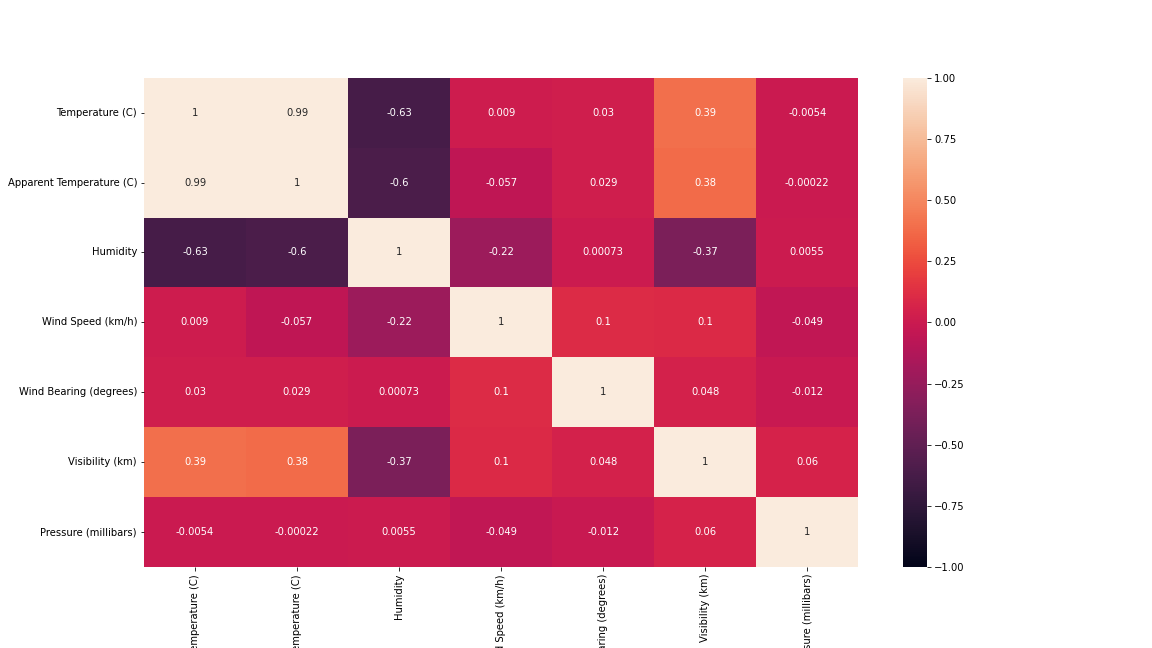

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

Por otra parte se grafican cruces entre todos los campos para poder tener una idea mas visual de como se ven estas relaciones, ademas de poder indentificar en que casos existen clusters o no, finalmente por tema de tiempo de computo y recursos esto se hizo con los primeros 500 registros del dataframe (podria aumentarse si asi se desea, no recomendamos poner mas de 2000-3000).

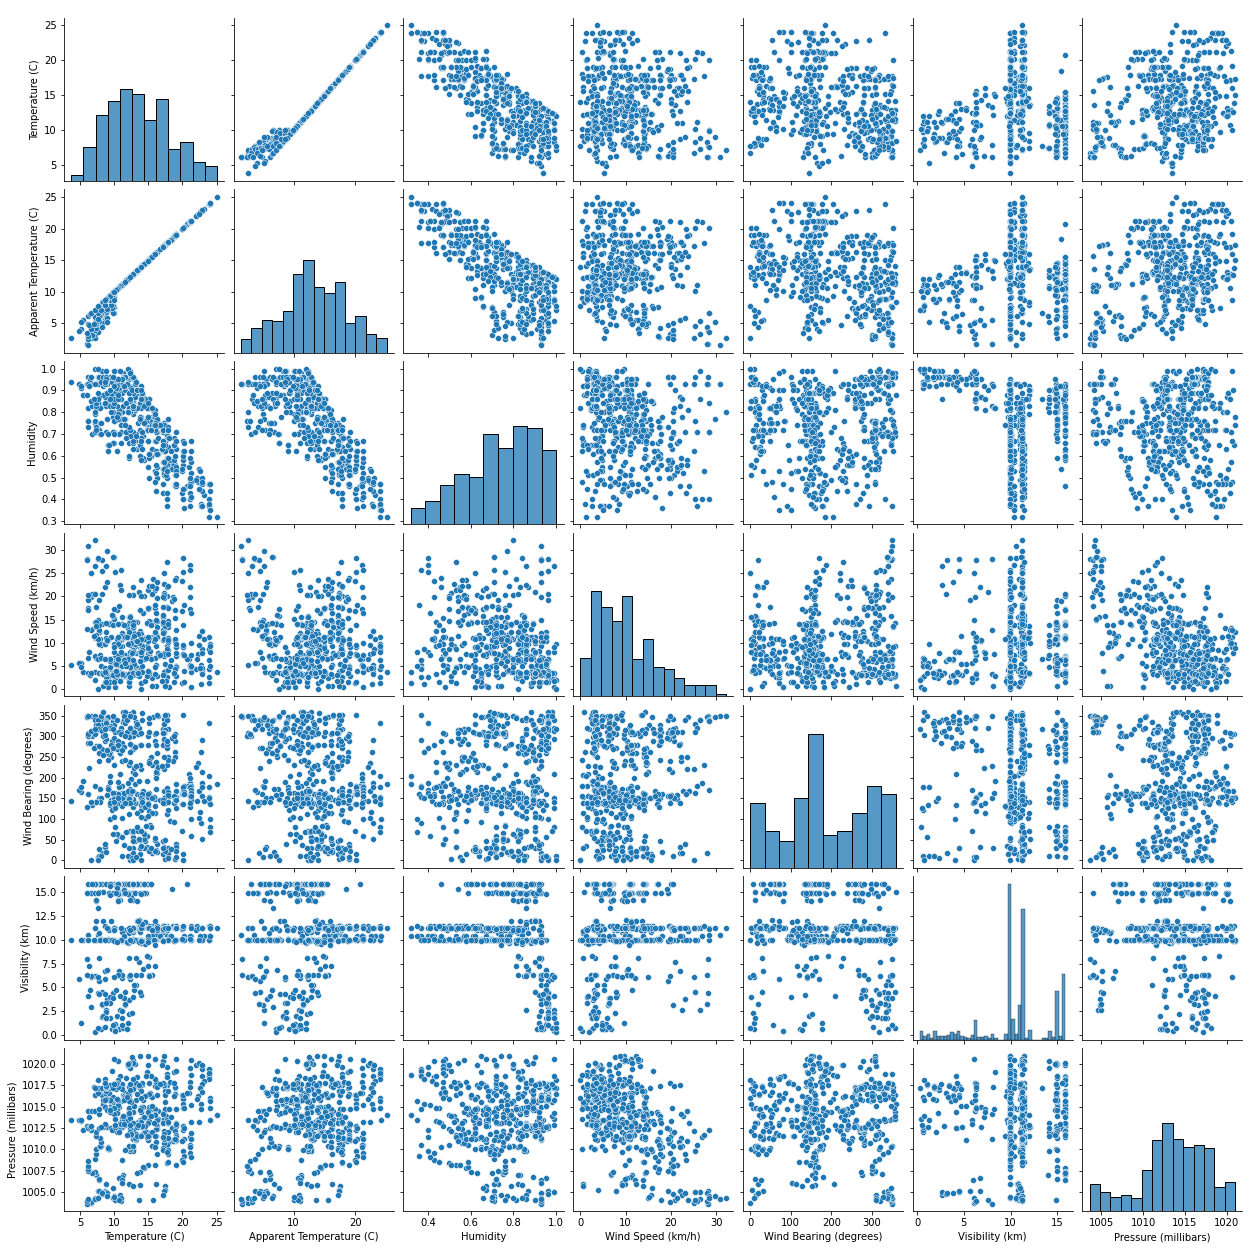

In [ ]:
littledf = df[:][:500]
sns.pairplot(littledf)

De los graficos anteriores podemos ver que los cruces que mas generan una relacion lineal son Humedad con Temperatura y Temperatura Aparente, y ademas Temperatura con Temperatura Aparente, dado que en los graficos con Humedad se ve "menos" la curva lineal, se decide trabajar con Humedad para determinar Temperatura.

Finalmente queremos saber el tamaño del dataframe para realizar la division de subconjuntos al 80/20, para training y testing.

In [ ]:
df.shape

(96453, 11)

Son 96453 lineas para 11 Columnas, se decide dividir en 80/20, entonces son 77162 para training y 19291 para testing, se divide el dataframe en 2 variables que se utilizaran en esta tarea como se menciono anteriormente.

In [ ]:
division = int(math.ceil(df.shape[0])*0.8)
dataframe_training = df.iloc[:division]
dataframe_testing = df.iloc[division:]
output.enable_custom_widget_manager()

##Parte 2 - KNN:

En esta parte se hara el desarrollo de K-Nearest Neighbors, para lo cual primero se importan las librerias necesarias.

In [ ]:
import matplotlib.patches as mpatches
import seaborn as sb

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

A continuación se eligen las métricas que se utilizarán para el desarrollo del modelo, en este caso se eligen Temperature (C), Apparent Temperature (C) y Humidity, estos en función de los valores de correlación obtenidos en el heatmap obtenidos del punto anterior.

In [ ]:
knnDF = df[['Temperature (C)','Apparent Temperature (C)', 'Humidity']]
knnDF.columns = ['Temperature', 'AppTemperature', 'Humidity']
X = knnDF.Humidity
y = knnDF.Temperature

Para la primera iteración se consideran Temperature y Humidity, de esta forma en X se encuentran los valores de Humidity, mientras que en Y se encuentran los valores de Temperature.



Ahora dividimos los datos a estudiar en un 80% para el entrenamiento de KNN y 20% para el testeo de éste. Esta división es consitente con la anteriormente vista, es decir, se utiliza el dataframe ordenado y toma el primer 80%  de los datos para el entrenamiento y el 20% final para el testeo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=False )

Se estandarizan los valores de cada columna con el uso de StandardScaler()

In [ ]:
scaler1 = StandardScaler() #MinMaxScaler()#LabelEncoder()#StandardScaler
scaler2 = StandardScaler()
scaler3 = StandardScaler() #MinMaxScaler()#LabelEncoder()#StandardScaler
scaler4 = StandardScaler()


Se preparan los datos para ser utilizados.
Se usa fit_transform() para los datos de entrenamiento, y transform() para los datos por testear, esto para que los datos de entrenamiento no se vean afectados por los de testeo.

In [ ]:
X_trained = X_train.values.reshape(-1, 1)
X_tested = X_test.values.reshape(-1, 1)
X_trained = scaler1.fit_transform(X_trained)
X_tested = scaler1.transform(X_tested)
y_trained = y_train.values.reshape(-1, 1)
y_tested =y_test.values.reshape(-1, 1)
y_trained = scaler2.fit_transform(y_trained)
y_tested = scaler2.transform(y_tested)

Se calculan los puntajes de precision del modelo KNN con distintos valores de N Neighbors, con el uso de KNeighborsRegressor, debido a la naturaleza de los datos utilizados(valores continuos).

In [ ]:
knn_r_acc = []
for i in range(1,21):
    knntry = KNeighborsRegressor(n_neighbors=i, metric='euclidean') #Se Calcula el knn con metodo euclidiano, para i= {1, 2, 3 ...20}
    knntry.fit(X_trained,y_trained)
    test_score = knntry.score(X_tested,y_tested)
    train_score = knntry.score(X_trained,y_trained)
    knn_r_acc.append((i, test_score ,train_score))
Results = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(Results)

     K  Test Score  Train Score
0    1    0.175477     0.173592
1    2    0.281585     0.270618
2    3    0.318798     0.307111
3    4    0.319416     0.312433
4    5    0.323373     0.313800
5    6    0.343514     0.333854
6    7    0.341683     0.327949
7    8    0.334755     0.321925
8    9    0.332944     0.319405
9   10    0.337055     0.322058
10  11    0.330388     0.317216
11  12    0.320276     0.307380
12  13    0.307967     0.291338
13  14    0.303188     0.281948
14  15    0.296907     0.274138
15  16    0.288563     0.263421
16  17    0.284541     0.257107
17  18    0.288138     0.262610
18  19    0.291734     0.268277
19  20    0.293927     0.271947


Revisando los resultados anteriores es que se decide dejar n=6, por obtener mejor puntaje entre los K probados.

Luego con el valor de N resuelto, se aplica el entrenamiento del modelo y se predicen los valores de Temperature en función de los valores de testeo de Humidity.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=6, metric='euclidean') #Se Calcula el knn con metodo euclidiano, con N=12
knn.fit(X_trained,y_trained)
pred = knn.predict(X_tested)
print(pred)

[[-0.31354934]
 [-0.16261476]
 [-0.44316764]
 ...
 [ 0.62350684]
 [ 0.52285192]
 [ 0.44351329]]


Se grafican a continuación los valores obtenidos en la predicción, en naranjo los originales, y en azul las predicciones obtenidas a partir de KNN. Cabe destacar que los valores mostrados en el gráfico son los correspondientes a los obtenidos luego del uso de MinMaxScaler(), donde estos son proporcionales a los originales, pero en escala de 0 a 1.

Text(0.5, 1.0, 'KNeighborsRegressor (k = 9)')

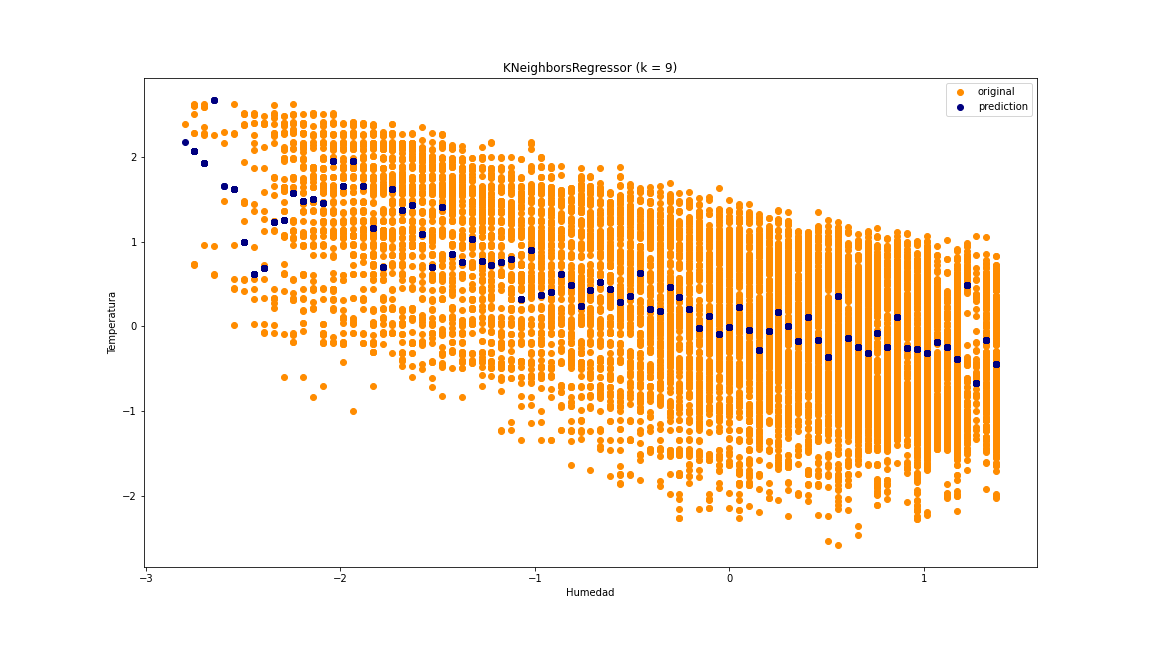

In [ ]:
plt.figure(figsize = (16,9))
plt.scatter(X_tested, y_tested, color="darkorange", label="original")
plt.scatter(X_tested, pred, color="navy", label="prediction")
plt.axis("tight")
plt.xlabel("Humedad")
plt.ylabel("Temperatura")
plt.legend()
plt.title("KNeighborsRegressor (k = 9)")

Es posible notar que los valores predichos se parecen bastante a los reales. Considerando el puntaje obtenido por el KNN anteriormente, es  un comportamiento esperado.

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
KNNmae = mean_absolute_error(y_true=y_tested,y_pred=pred)
#Este es el Error Absoluto Medio
print(f'Mean Absolute Error (MAE): {KNNmae}\n')
# Error Cuadrado Medio
print(f"Mean squared error (MSE): %.2f \n" % mean_squared_error(y_tested, pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print(f'Variance score (R^2): %.2f' % r2_score(y_tested, pred))

Mean Absolute Error (MAE): 0.627863909650973

Mean squared error (MSE): 0.56 

Variance score (R^2): 0.34


------------------------------------
A continuación se hace una nueva iteración de KNN, en su formato multivariable, donde en X se encontrarán los valores de Apparent Temperature y Humidity, mientras que los valores a predecir en Y será el de Temperature, de esta forma poder estudiar como mejora el modelo al entregarle mas informacion.

In [ ]:
knnDF2 = df[['Temperature (C)', 'Humidity', 'Apparent Temperature (C)']]
knnDF2.columns = ['Temperature', 'Humidity', 'AppTemperature',]
X2 = knnDF[['Humidity', 'AppTemperature']]
y2 = knnDF2.Temperature
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0, test_size=0.2, shuffle=False )
scaler = StandardScaler() #MinMaxScaler()#LabelEncoder()#StandardScaler
#X2_trained = X2_train.values.reshape(-1, 1) Para este caso, no es necesario por ser un array 2-D
#X2_tested = X2_test.values.reshape(-1, 1)
X2_trained = scaler.fit_transform(X2_train)
X2_tested = scaler.transform(X2_test)
y2_trained = y2_train.values.reshape(-1, 1)
y2_tested =y2_test.values.reshape(-1, 1)
y2_trained = scaler.fit_transform(y2_trained)
y2_tested = scaler.transform(y2_tested)



Se calculan los puntajes de precision del modelo KNN con distintos valores de N Neighbors, con el uso de KNeighborsRegressor, debido a la naturaleza de los datos utilizados(valores continuos).

In [ ]:
knn_r_acc2 = []
for i in range(1,21):
    knn2 = KNeighborsRegressor(n_neighbors=i, metric='euclidean') #Se Calcula el knn con metodo euclidiano, para i= {1, 2, 3 ...20}
    knn2.fit(X2_trained,y2_trained)
    test_score = knn2.score(X2_tested,y2_tested)
    train_score = knn2.score(X2_trained,y2_trained)
    knn_r_acc2.append((i, test_score ,train_score))
Results2 = pd.DataFrame(knn_r_acc2, columns=['K','Test Score','Train Score'])
print(Results2)


     K  Test Score  Train Score
0    1    0.986043     0.997445
1    2    0.989643     0.996292
2    3    0.990885     0.995284
3    4    0.991540     0.994645
4    5    0.991855     0.994238
5    6    0.992099     0.993959
6    7    0.992298     0.993710
7    8    0.992432     0.993559
8    9    0.992580     0.993423
9   10    0.992617     0.993308
10  11    0.992650     0.993210
11  12    0.992684     0.993110
12  13    0.992733     0.993039
13  14    0.992773     0.992979
14  15    0.992796     0.992908
15  16    0.992826     0.992854
16  17    0.992847     0.992794
17  18    0.992860     0.992754
18  19    0.992870     0.992704
19  20    0.992882     0.992659


Revisando los resultados anteriores es que se decide usar un n=3, ademas se observa como el puntaje aumenta considerablemente vs el caso univariado.

Luego con el valor de N resuelto, se aplica el entrenamiento del modelo y se predicen los valores de Temperature en función de los valores de testeo de Humidity y Apparent Temperature.

In [ ]:
knn2 = KNeighborsRegressor(n_neighbors=3, metric='euclidean') #Se Calcula el knn con metodo euclidiano, con N=12
knn2.fit(X2_trained,y2_trained)
pred2 = knn2.predict(X2_tested)
print(pred2)


[[-0.98936155]
 [-1.00771459]
 [-0.94080249]
 ...
 [ 1.05317811]
 [ 0.99678077]
 [ 0.88398609]]


Se grafican los valores originales (en naranjo) y los valores predichos (en azul). Ambos en función de Humidity. Nuevamente cabe destacar que los valores mostrados en el gráfico son los correspondientes a los obtenidos luego del uso de StandardScaler(), donde estos son proporcionales a los originales.

Text(0.5, 1.0, 'KNeighborsRegressor (k = 3)')

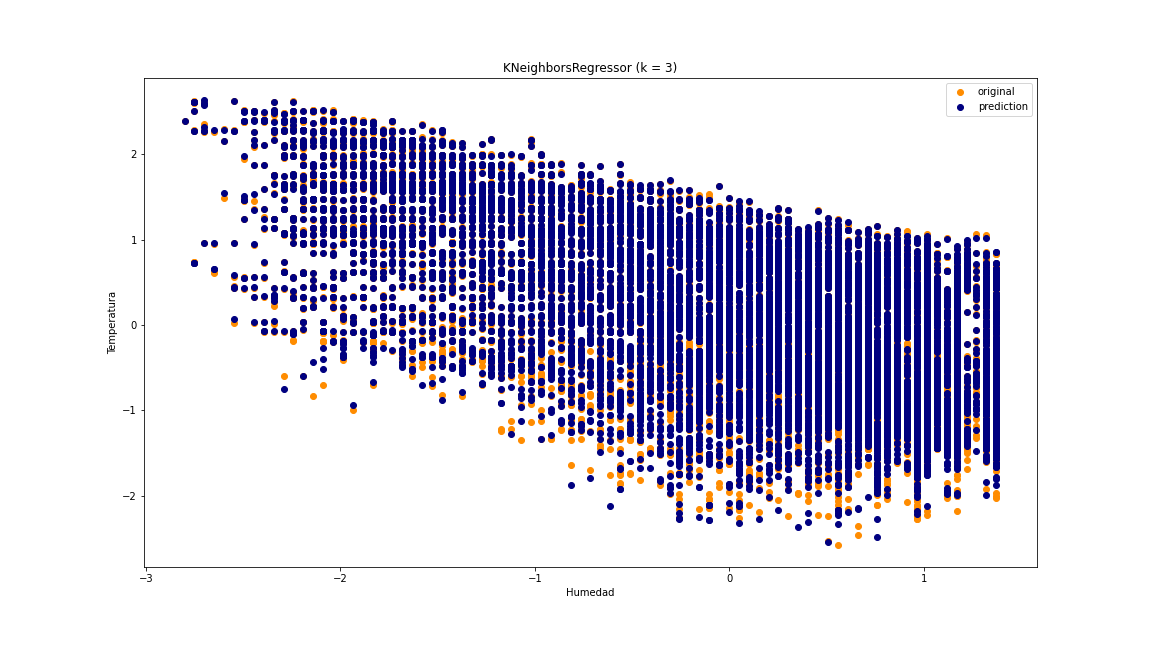

In [ ]:
plt.figure(figsize = (16,9))
plt.scatter(X2_tested[:, 0], y2_tested, color="darkorange", label="original")
plt.scatter(X2_tested[:, 0], pred2, color="navy", label="prediction")
plt.axis("tight")
plt.xlabel("Humedad")
plt.ylabel("Temperatura")
plt.legend()
plt.title("KNeighborsRegressor (k = 3)")



Se puede observar que obtienen valores dentro de lo esperado, además se aprecia una dispersion pequeña, dado que los datos azules tienden a estar más centrados y los naranjos se ven a través de ellos, esto es debido a que al tener un puntaje tan cercano al 1, el dato se ajusta mucho al modelo.

A continuación se grafican los valores originales y los predichos de Temperature en función de Humidity y Apparent Temperature.

(Notar que como es un grafico 3D, presenta en la parte superior izquierda un panel de comandos que permite interactuar con el grafico para ver otros angulos)

Text(0.5, 0, 'Temperatura')

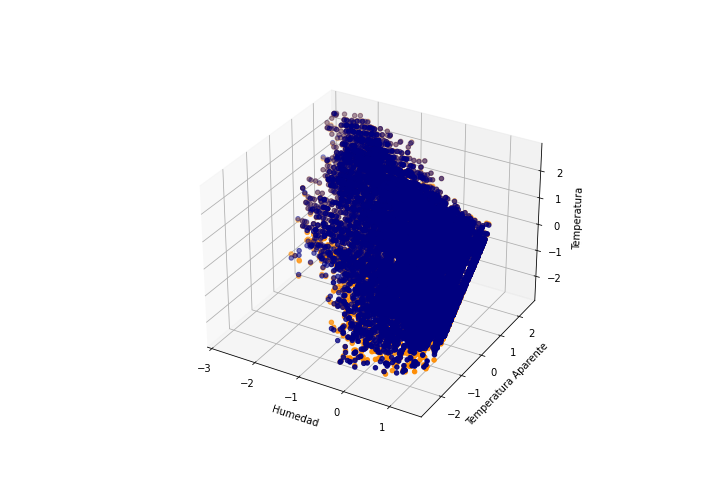

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter3D(X2_tested[:,0], X2_tested[:,1], y2_tested, color="darkorange", label="original")
ax.scatter3D(X2_tested[:,0], X2_tested[:,1], pred2, color="navy", label="prediction")
ax.set_xlabel('Humedad')
ax.set_ylabel("Temperatura Aparente")
ax.set_zlabel("Temperatura")

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
KNN2mae = mean_absolute_error(y_true=y2_tested,y_pred=pred2)

In [ ]:
#Este es el Error Absoluto Medio
print(f'Mean Absolute Error (MAE): {KNN2mae}\n')
# Error Cuadrado Medio
print(f"Mean squared error (MSE): %.2f \n" % mean_squared_error(y2_tested, pred2))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print(f'Variance score: %.2f' % r2_score(y2_tested, pred2))

Mean Absolute Error (MAE): 0.044642908052271106

Mean squared error (MSE): 0.01 

Variance score: 0.99


Se procede entonces a hacer la comparacion de las métricas de error, las métricas elegidas fueron Mean Absolute Error, Mean Squared Error y la Varianza, donde cada una significa:


*   MAE: proporciona el promedio de la diferencia absoluta entre la predicción del modelo y el valor objetivo.
*   MSE: proporciona el promedio de los errores al cuadrado entre el estimador y lo que se estima.
*   $R^2$: funciona como una medición del grado de correlación entre los datos, por lo que un valor cercano a 1 se puede considerar muy bueno, mientras que mas cercano a 0 se considera que el modelo no quedo muy bueno.

Para la primera ejecución univariada obtuvimos los siguientes valores:

*   Mean Absolute Error (MAE): 0.6278

*   Mean squared error (MSE): 0.56

*   Variance score ($R^2$): 0.34

Mientras que la segunda ejecución multivariada retornó:

*   Mean Absolute Error (MAE): 0.0446

*   Mean squared error (MSE): 0.01

*   Variance score ($R^2$): 0.99

Primero entre las medidas de error, podemos observar que el MAE y el MSE tienen comportamientos parecidos, donde a medida que disminuyen implican un mejor ajuste en el modelo, dado que son diferencias entre valores y promedios, por otra parte tenemos el valor del $R^2$, el cual nos dio 0.34 lo cual indicaría que el modelo no quedó muy ajustado.
Ahora si comparamos los valores obtenidos por el modelo univariado y el multivariado observamos que el multi es mucho mejor, dado que el error absoluto y el error cuadrado dieron valores muy pequeños (del orden de 0.01), ademas del $R^2$ que tiene un valor de 0.99 lo cual indicaria que el modelo esta muy bien ajustado.

##Parte 3 - Regresion Lineal:

Para esta parte de la tarea se trabajará sobre la relación entre humedad y temperatura, donde humedad o "Humidity" sera nuestra variable independiente y la temperatura o "Temperature (C)" sera la variable dependiente.

Dado que en la imagen de los gráficos se veia que había una fuerte relación tambien con la temperatura aparente, se crea una copia del dataset con estos 3 campos para facilitar visualizaciones y trabajo.

In [ ]:
humedadTemperatura_dftrain = dataframe_training[['Temperature (C)','Apparent Temperature (C)', 'Humidity']]
humedadTemperatura_dftrain.columns = ['Temperature', 'AppTemperature', 'Humidity']

humedadTemperatura_dftest = dataframe_testing[['Temperature (C)','Apparent Temperature (C)', 'Humidity']]
humedadTemperatura_dftest.columns = ['Temperature', 'AppTemperature', 'Humidity']

A continuación se muestra la relacion entre los datos, donde podemos ver que humedad y temperatura presentan una correlación de -0.63, lo cual indicaría que es una relación linealmente descendiente.

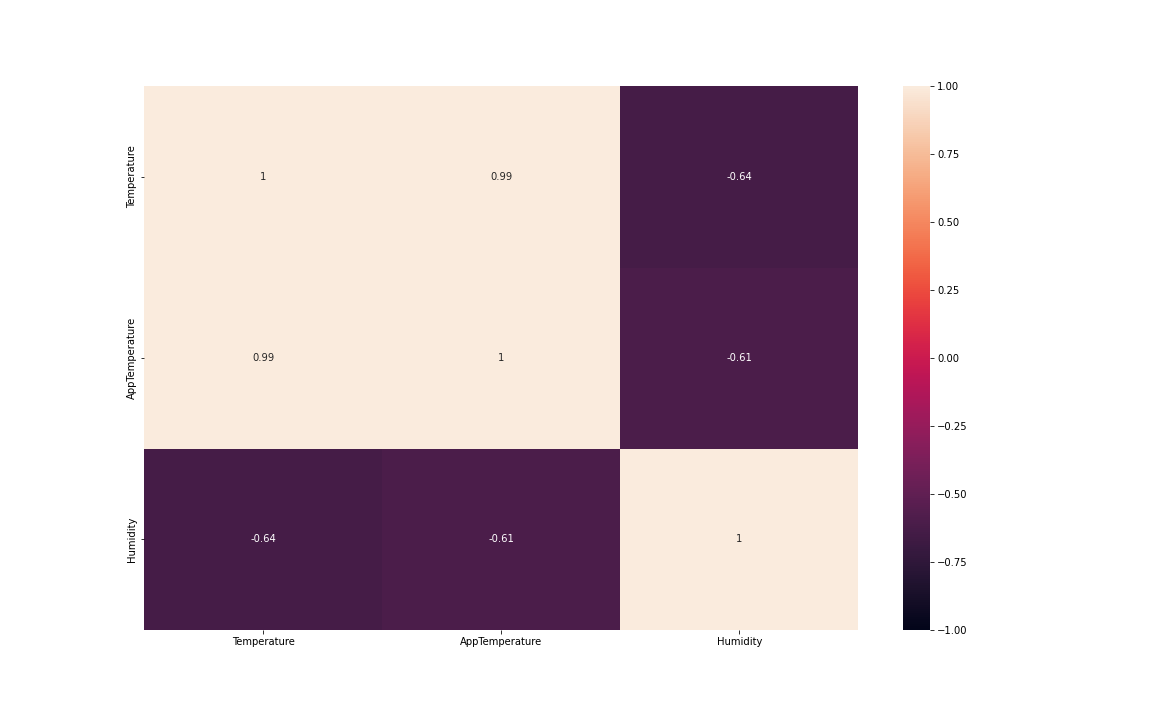

In [ ]:
plt.figure(figsize = (16,10))
heatmap = sns.heatmap(humedadTemperatura_dftrain.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression

data = pd.DataFrame()
data["Humidity"] = humedadTemperatura_dftrain[["Humidity"]]
x_train = np.array(data)
y_train = humedadTemperatura_dftrain["Temperature"].values

#Se crea el objeto LinearRegression y se entrena con el subconjunto de entrenamiento
regresion = linear_model.LinearRegression()
regresion.fit(x_train, y_train)

#Se crean los X e Y para testing
data2 = pd.DataFrame()
data2["Humidity"] = humedadTemperatura_dftest[["Humidity"]]
x_test = np.array(data2)
y_test = humedadTemperatura_dftest["Temperature"].values

y_pred = regresion.predict(x_test)                                     # Realiza predicciones sobre el test
accuracy_score = regresion.score(x_test, y_test)                       # Puntaje de precision
print("Puntaje de precision del modelo de regresion lineal: " + "{:.1%}".format(accuracy_score))



Puntaje de precision del modelo de regresion lineal: 37.5%


Se obtiene un valor de precicion de 37.5% lo cual es un valor muy bajo e indicaría que el modelo no está lo suficientemente ajustado.

Se procede a Graficar la función hipotesis, la cual es de la forma:

$\mathrm{h_θ}= \theta _0 + θ_1 x$

además de obtener los valores de los $\theta_0$ y $\theta_1 $ en conjunto con las medidas de error.

Coeficiente theta1: -31.31512402346279 

Coeficiente theta0: 34.714894214269734

Mean Absolute Error (MAE): 5.882111401873602 

Mean squared error (MSE): 50.38 

Variance score (R^2): 0.38 



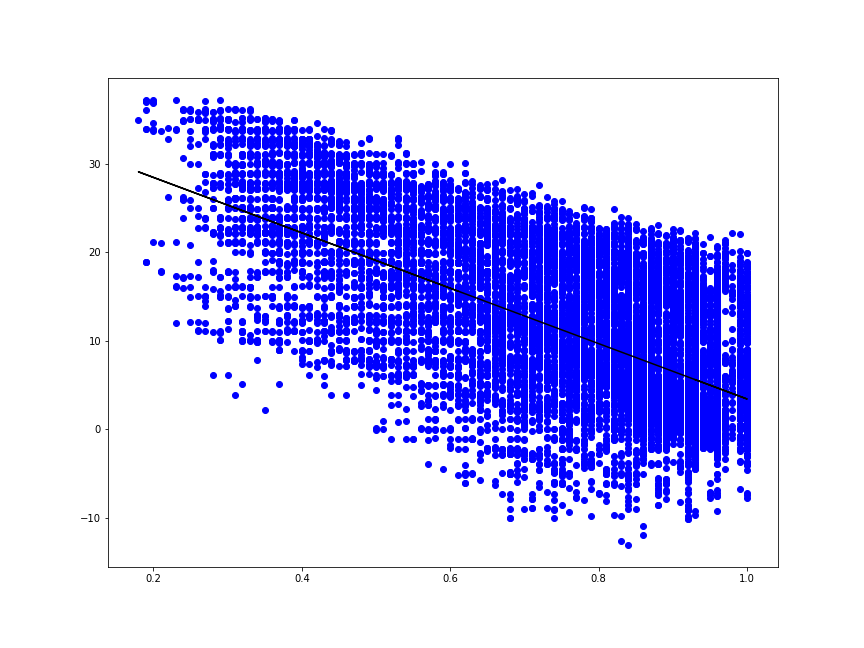

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
plt.figure(figsize = (12,9))
plt.scatter(x_test, y_test, color ='b')
plt.plot(x_test, y_pred, color ='k')
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print(f'Coeficiente theta1: {regresion.coef_[0]} \n')
# Este es el valor donde corta el eje Y (en X=0)
print(f'Coeficiente theta0: {regresion.intercept_}\n')
#Este es el Error Absoluto Medio
print(f'Mean Absolute Error (MAE): {mae} \n')
# Error Cuadrado Medio
print("Mean squared error (MSE): %.2f \n" % mean_squared_error(y_test, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score (R^2): %.2f \n' % r2_score(y_test, y_pred))
plt.show()

A continuación se procede a hacer un ejemplo multivariado, en el cual a las variables independientes se le agrega la temperatura aparente para ver como mejora el modelo.
Se retornan la presición del modelo, los valores de $θ_i$ ademas de los errores.

In [ ]:
data3 = pd.DataFrame()
data3["Humidity"] = humedadTemperatura_dftrain[["Humidity"]]
data3['AppTemperature'] = humedadTemperatura_dftrain['AppTemperature']
xy_train = np.array(data3)
z_train = humedadTemperatura_dftrain["Temperature"].values

data4 = pd.DataFrame()
data4["Humidity"] = humedadTemperatura_dftest["Humidity"]
data4['AppTemperature'] = humedadTemperatura_dftest['AppTemperature']
xy_test = np.array(data4)
z_test = humedadTemperatura_dftest["Temperature"].values

regresion2 = linear_model.LinearRegression()
regresion2.fit(xy_train, z_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
z_pred = regresion2.predict(xy_test)
accuracy_score2 = regresion2.score(xy_test, z_test)
mae = mean_absolute_error(y_true=z_test,y_pred=z_pred)

# Puntaje de precision
print("Puntaje de precision del modelo de regresion lineal: " + "{:.1%} \n".format(accuracy_score2))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print(f'Coeficientes (theta1 y theta2): {regresion2.coef_} \n')
# Este es el valor donde corta el eje Y (en X=0)
print(f'Coeficiente theta0:  {regresion2.intercept_} \n')
#Este es el Error Absoluto Medio
print(f'Mean Absolute Error (MAE): {mae}\n')
# Error Cuadrado Medio
print(f"Mean squared error (MSE): %.2f \n" % mean_squared_error(z_test, z_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print(f'Variance score: %.2f' % r2_score(z_test, z_pred))

Puntaje de precision del modelo de regresion lineal: 98.9% 

Coeficientes (theta1 y theta2): [-2.69131404  0.85687497] 

Coeficiente theta0:  4.600464692433219 

Mean Absolute Error (MAE): 0.7405501952003442

Mean squared error (MSE): 0.91 

Variance score: 0.99


A continuacion se genera un grafico 3D donde se pueden ver los puntos de test y training ademas del hiperplano generado por la función hipotesis $\mathrm{h_θ}= \theta _0 + θ_1 x_1 + θ_2 x_2$

Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

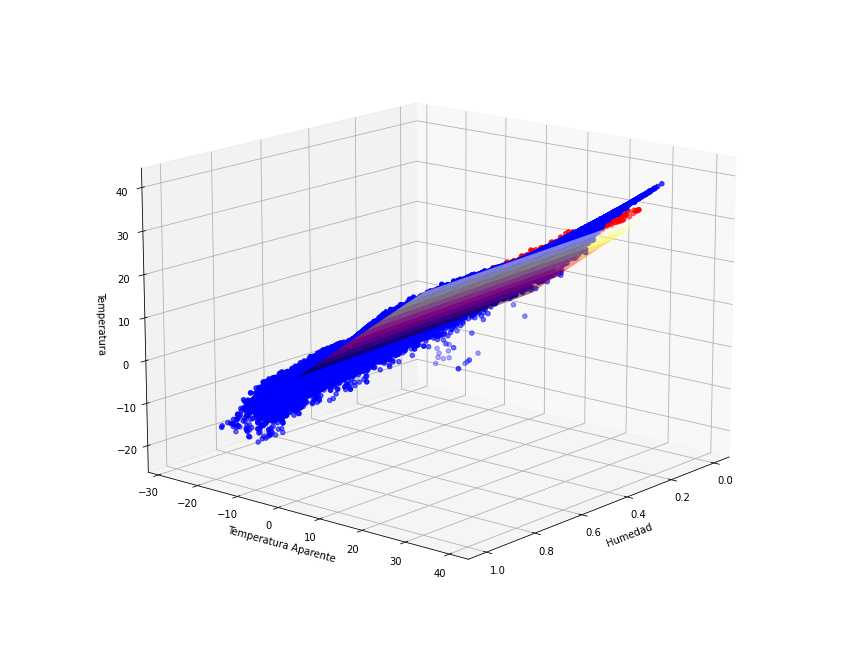

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
output.disable_custom_widget_manager()
output.enable_custom_widget_manager()
fig = plt.figure(figsize = (12,9))
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 1, num=10), np.linspace(0, 30, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regresion2.coef_[0] * xx)
nuevoY = (regresion2.coef_[1] * yy)

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regresion2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.5, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(xy_train[:, 0], xy_train[:, 1], z_train, c='blue')

# Graficamos en rojo, los puntos que
ax.scatter(xy_test[:, 0], xy_test[:, 1], z_pred, c='red')

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=15., azim=40)

ax.set_xlabel('Humedad')
ax.set_ylabel('Temperatura Aparente')
ax.set_zlabel('Temperatura')
ax.set_title('Regresión Lineal con Múltiples Variables')

Los valores de errores obtenidos para la regresion lineal son los siguientes:
En el caso univariado:

*   Mean Absolute Error (MAE): 5.882111401873602

*   Mean squared error (MSE): 50.38

*   Variance score (R^2): 0.38

En el caso multivariado:

*   Mean Absolute Error (MAE): 0.7405501952003442

*   Mean squared error (MSE): 0.91

*   Variance score: 0.99

Podemos observar como el tanto el MAE y el MSE en ambos casos disminuyen cuando se agregan multivariables, donde la mayor diferencia se observa en el MSE que bajo de 50 a 0.9, por otra parte el $R^2$ nuevamente pasa de estar cercano a los 0.38 a tener un valor casi perfecto con los 0.99, esto se debe a que la relacion lineal entre temperatura aparente y temperatura es demasiado ajustada, por lo cual ayuda a que el modelo quede bien ajustado.

-----------------------------------------------------
Ahora comparando MSE entre KNN y Regresion Lineal, analizaremos el caso univariado, además destacar que estos corresponden al cuadrado del error, por lo que para analizarlos mejor se calculará el valor no cuadrado, entonces los valores obtenidos fueron:

*   KNN: 0.56 => 0.75
*   ReL: 50.38 => 7.10

Entonces este valor como podemos ver corresponde al cuadrado del erro que tienden a tener los datos, podemos notar que en KNN el valor es mucho menor que en la relación Lineal pese a que la regresión obtuvo un mejor $R^2$



##Parte 4 - Gaussian Mixture Model y DBSCAN:




Primero se realizará el trabajo para GMM y luego para DBSCAN, entonces se procede a importar las librerias que se utilizarán en esta parte del trabajo.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score


###Gaussian Mixture Model (GMM):

In [ ]:
#Se normaliza la información que se usará para el módelo GMM
min_max_scaler = MinMaxScaler()
df_gmm = dataframe_training[['Humidity', 'Temperature (C)']]
df_gmm = min_max_scaler.fit_transform(df_gmm)

# Se normalizan los datos de testing
min_max_scaler = MinMaxScaler()
df_gmm_t = dataframe_testing[['Humidity','Temperature (C)']]
df_gmm_t = min_max_scaler.fit_transform(df_gmm_t)


A continuación se estima el tipo de covarianza y número de Clusters ideal para el moddelo GMM, esto puede tomar un par de minutos, por lo que se deja una imagen de los resultados obtenidos.

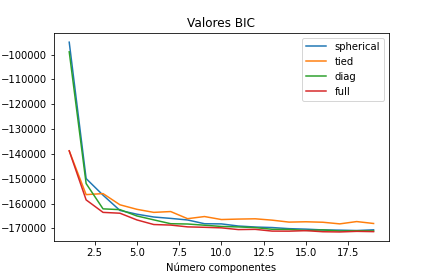

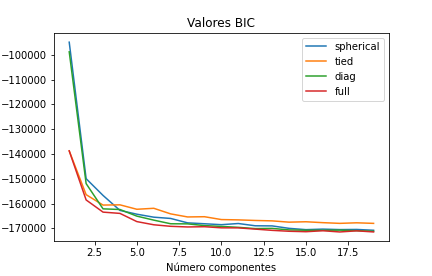

In [ ]:

# Se grafican los valores de BIC, para cada tipo de covarianza, con clusters n ={1, 2, 3, ... 20}
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

n_components = range(1, 20)
covariance_types = ['spherical', 'tied', 'diag', 'full']
for covariance_type in covariance_types:
    valores_bic = []
    for i in n_components:
        modelo = GaussianMixture(n_components=i, covariance_type=covariance_type)
        modelo = modelo.fit(df_gmm)
        valores_bic.append(modelo.bic(df_gmm))
    ax.plot(n_components, valores_bic, label=covariance_type)

ax.set_title("Valores BIC")
ax.set_xlabel("Número componentes")
ax.legend();


De esto se obtiene que el la covarianza ideal es de tipo "full" y mientras más clusters mejor es el modelo, mientras sean mas de 3 de estos. Se decide hacer un modelo con 15 clusters.

In [ ]:
#df_gmm = df_gmm.values.reshape(-1, 1)
#Creamos el objeto que contendrá al modelo.
gmm = GaussianMixture(n_components=15,
                      covariance_type="full",
                      max_iter = 1000,
                      random_state=30)


In [ ]:
#Se entrena a GMM con el 80% de los datos.
preds = gmm.fit_predict(df_gmm)
print(preds)

[10 10 10 ...  2  2  2]


In [ ]:
#Se muestran los pesos de cada cluster
gmm.weights_

array([0.09536818, 0.0448442 , 0.10030594, 0.07486974, 0.09217849,
       0.06096583, 0.04597348, 0.06644992, 0.04368642, 0.06231775,
       0.11395398, 0.05147411, 0.02756531, 0.04314646, 0.07690018])

El peso del total de los clusters es 1, y cada uno de ellos muestra las probabilidades de que un dato cualquiera sea parte de dicho cluster.
De los resultados anteriores se desprende que el cluster de mayor peso es el número 11, es decir, hay una probabilidad de 0.11395398 de ser parte de este cluster.


In [ ]:
#Evaluación, puntaje de silueta.
silhouette_score(df_gmm, preds)

0.3395912996838657

Cuando el coeficiente de silueta es 1 significa que cada cluster está claramente definido y tiene una distancia entre ellos capaz de distinguirlos fácilmente uno de otro. Cuando este es O significa que las divisiones entre clusters no son ideales. Finalmente si este valor es -1 significa que los clusters no están bien asignados. Del valor obtenido, se desprende que este si presenta clusters bien asignados, pero no son ideales.



A continuación se grafican los clusters hechos por el modelo GMM. Cada color representa un cluster de datos.

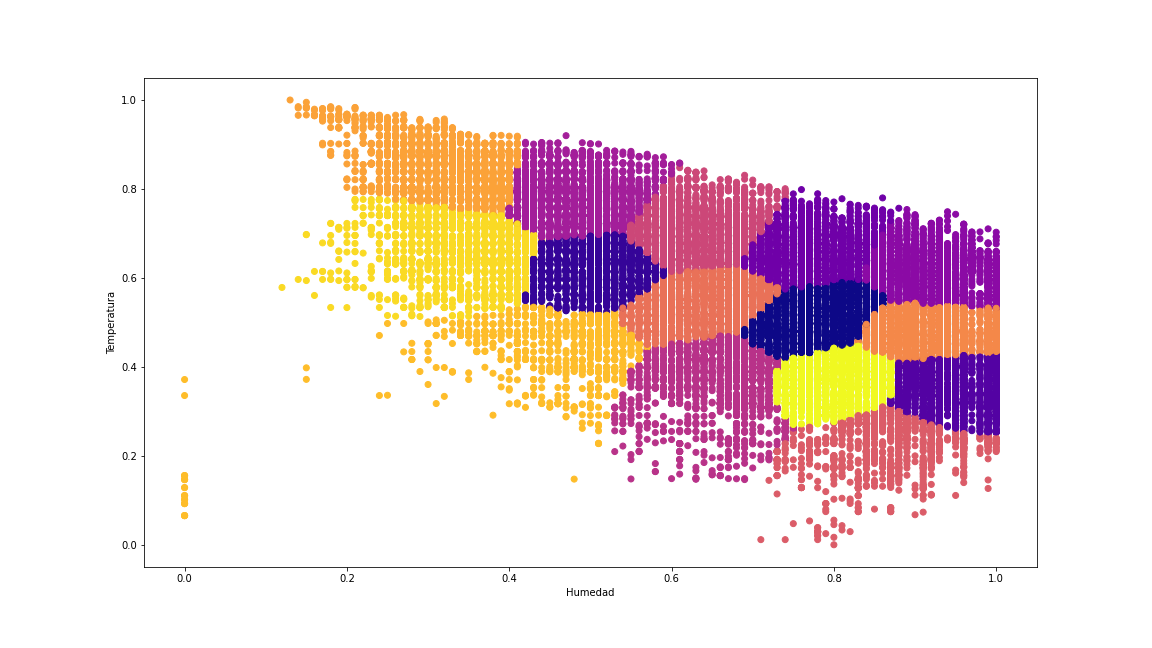

In [ ]:
#Se predicen los valores de gmm usando el los datos de testing
clustersGMM = gmm.predict(df_gmm_t)

# Graficación de los clústers.
plt.figure(figsize = (16,9))
plt.scatter(df_gmm[:, 0], df_gmm[:, 1] , c= preds, cmap="plasma")
plt.xlabel("Humedad")
plt.ylabel("Temperatura")
plt.show()

De esto se logra desprender que datos que pareciesen ser outliers, de todas formas son clasificados en un cluster. Estos no están claramente divididos, como era de esperarse segun el coeficiente de silueta obtenido anteriormente.

Luego se grafican los datos de testeo, en el cluster que pertenecerian bajo este modelo.

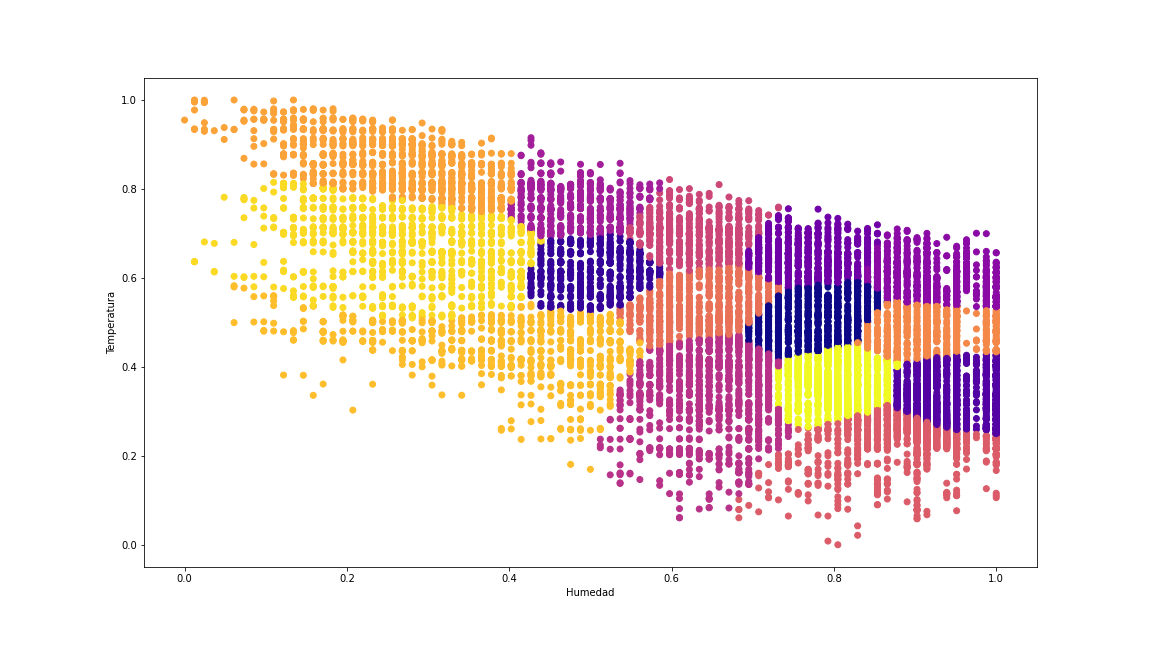

In [ ]:
# Graficación de los clústers.
plt.figure(figsize = (16,9))
plt.scatter(df_gmm_t[:, 0], df_gmm_t[:, 1] , c= clustersGMM, cmap="plasma")
plt.xlabel("Humedad")
plt.ylabel("Temperatura")
plt.show()

###Density Based Spatial Clustering of Application with Noise (DBSCAN):
A continuación se trabajará con el algoritmo DBSCAN.


In [ ]:
from sklearn import preprocessing
from sklearn.cluster import DBSCAN

# Se normalizan los datos de training con MinMax()
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado_train = min_max_scaler.fit_transform(dataframe_training[['Temperature (C)', 'Humidity']])
df_escalado_train = pd.DataFrame(df_escalado_train)

# Se normalizan los datos de testing con MinMax()
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado_test = min_max_scaler.fit_transform(dataframe_testing[['Temperature (C)', 'Humidity']])
df_escalado_test = pd.DataFrame(df_escalado_test)

# Se renombran las columnas
df_escalado_train = df_escalado_train.rename(columns = {0: 'Temperature', 1: 'Humidity'})
df_escalado_test = df_escalado_test.rename(columns = {0: 'Temperature', 1: 'Humidity'})

El siguiente cuadro de código puede demorar un poco en ejecutarse.

In [ ]:
# Ejecutamos DBSCAN
dbscan = DBSCAN(eps=0.08, min_samples = 5, metric = "euclidean").fit(df_escalado_train)
clusters = dbscan.fit_predict(df_escalado_train)
df_values = dataframe_training[['Temperature (C)', 'Humidity']].values

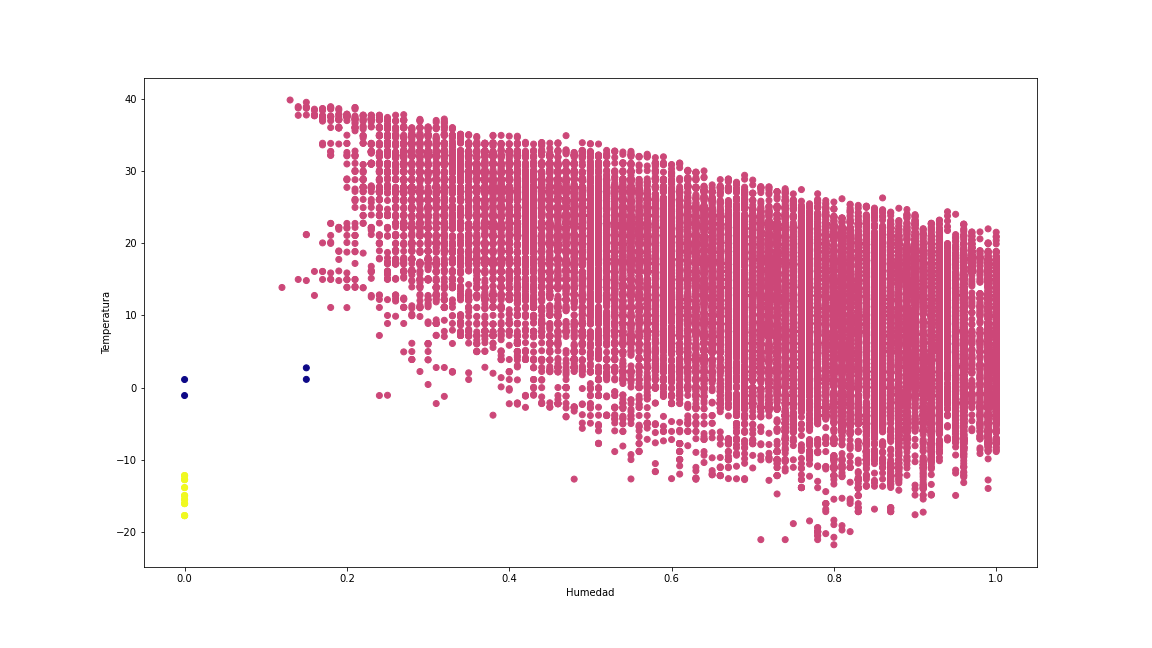

In [ ]:
# Graficación de los clústers.
plt.figure(figsize = (16,9))
plt.scatter(df_values[:, 1], df_values[:, 0] , c= clusters, cmap="plasma")
plt.xlabel("Humedad")
plt.ylabel("Temperatura")
plt.show()

En la siguiente parte se quiere graficar la curva "elbow" para encontrar el mejor valor de $ϵ$, el cual corresponde a la distancia minima entre puntos para que se consideren parte del mismo cluster, pero el dataset de training es demasiado grande para la RAM disponible en Google Colab (son 77000+ lineas del dataset en un doble for :c ), por lo que se usara testing solo para calcular la curba "elbow" dado que deberia ser mas menos parecida.

Ademas notar que este cuadro de código tambien se demora su buen rato en ejecutarse.

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


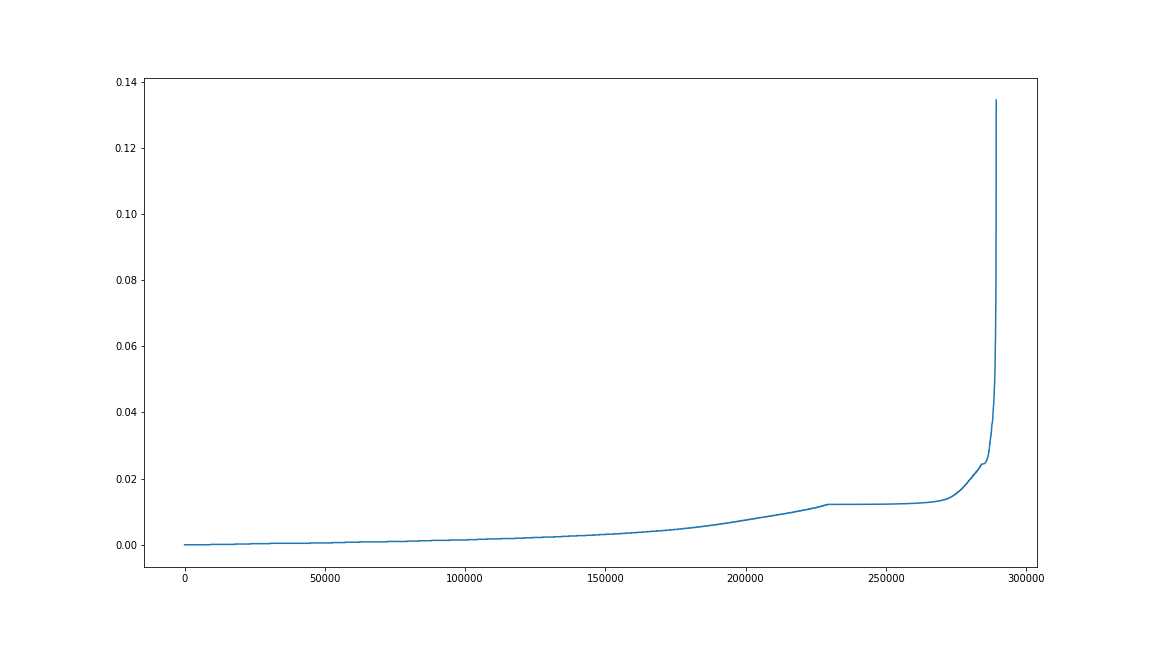

In [ ]:
import sklearn.neighbors
from sklearn.decomposition import PCA
from sklearn.neighbors import kneighbors_graph
## Parametrización de DBSCAN.
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(df_escalado_test)
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(X_pca)
minPts  = 15 # Fijamos el parámetro minPts
A = kneighbors_graph(X_pca, minPts, include_self=False)
Ar = A.toarray()
seq = []
for i,s in enumerate(X_pca):
    for j in range(len(X_pca)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
seq.sort()
plt.figure(figsize = (16,9))
plt.plot(seq)
plt.show()

Los puntos para determinar el mejor $ϵ$, son donde la curva empieza a ser exponencial, lo cual seria entre 0.0125 y 0.0252 (se puede ver posicionando el mouse sobre la curba y corresponde al y), por lo que se usara el promedio entre estos, el cual seria $ϵ=$ 0.01885.

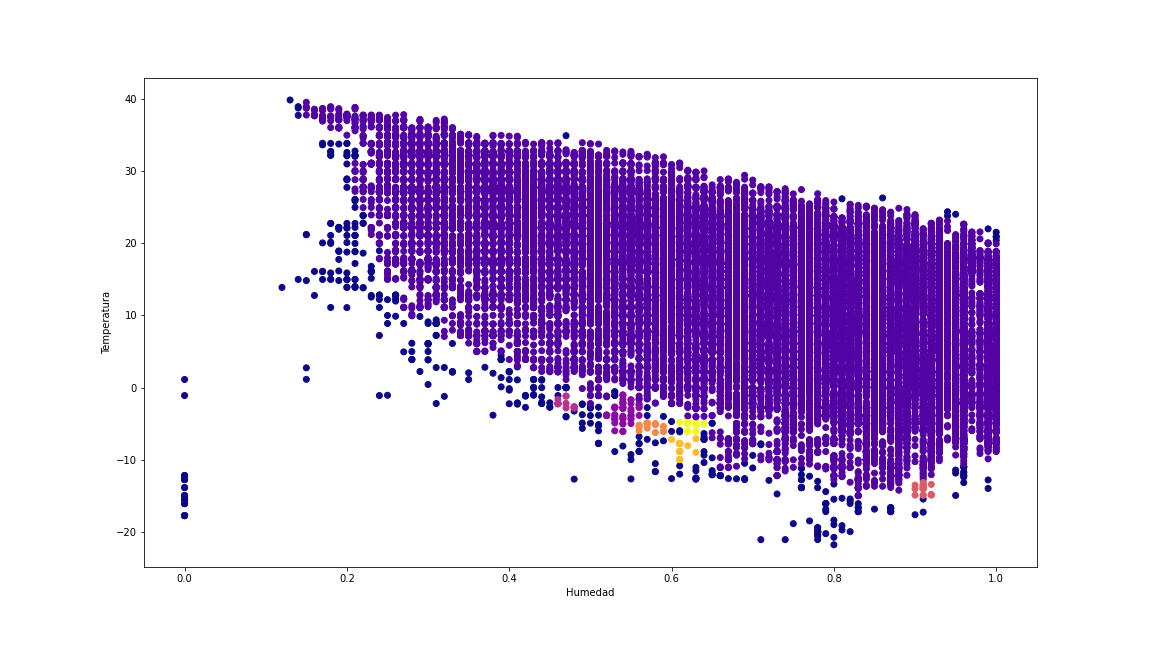

In [ ]:
# Ejecutamos DBSCAN
dbscan = DBSCAN(eps=0.01885, min_samples = 15, metric = "euclidean").fit(df_escalado_train)
clusters = dbscan.fit_predict(df_escalado_train)
df_values = dataframe_training[['Temperature (C)', 'Humidity']].values
# Graficación de los clústers.
plt.figure(figsize = (16,9))
plt.scatter(df_values[:, 1], df_values[:, 0], c=clusters, cmap="plasma")
plt.xlabel("Humedad")
plt.ylabel("Temperatura")
plt.show()

Podemos observar que el algoritmo encontró un gran cluster (el morado) ademas de 6 clusters mas pequeños, lo cual daria un total de 7 clusters.

Ademas notar que los puntos azul oscuros corresponden a los outliers.

In [ ]:
# Vemos cada uno de los clusters cuántos valores tiene.
copy = pd.DataFrame()
copy['Temperature (C)']=dataframe_training['Temperature (C)'].values
copy['Humidity']=dataframe_training['Humidity'].values
copy['label'] = clusters;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

cantidad
label          
-1          423
 0        76599
 1           50
 2           16
 3           18
 4           19
 5           21
 6           16

###Análisis GMM v/s DBSCAN

DBSCAN logra diferenciar a los outliers del dataset, esto porque no logran cumplir las reglas mínimas para pertenecer a un cluster, que son tener un número N mínimo de datos y la densidad en un radio $ϵ$. De esta forma se podria ver como una ventaja frente a GMM ya que puede diferenciar los outlier de los clusters.
Por otra parte, GMM clasifica toda la información en clusters, es decir, no obtiene los outliers del dataset y genera un mapeo general con todos los datos.

Por otra parte, a la hora de clasificar puntos en una cantidad de clusters, GMM resulta una mejor opción que DBSCAN, al estar centrado en dejar toda la información dentro de clusters. De todas formas DBSCAN hace un mejora trabajo en identificar regiones densas y por lo tanto, regiones que implican un cluster.

Para el cálculo óptimo del modelo GMM fue necesario primero obtener el número de clusters necesarios, mientras que DBSCAN no requiere de esto para funcionar. Sin embargo para este último si fue necesario calcular el valor $ϵ$ óptimo o ideal, que resultó ser complejo para el tamaño de los datos con el que se trabajó originalmente, donde fue necesario calcular el modelo a partir de la división de información que correspondía originalmente al grupo de testeo.

